In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


[2017-01-05 19:47:34,258] Making new env: CartPole-v0


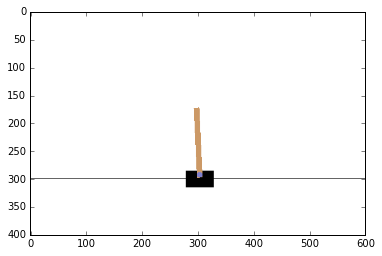

In [4]:
from qlearningAgents import QLearningAgent
import gym
env = gym.make("CartPole-v0")
plt.imshow(env.render('rgb_array'))

In [6]:
def preprocess(s):
    s[1] /=5
    s[3] /=10
    return tuple(map(lambda v:round(v*3,1),s))

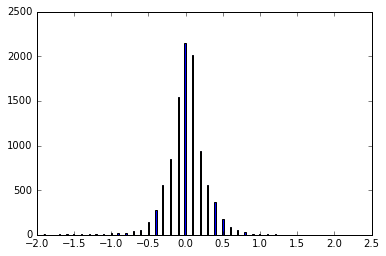

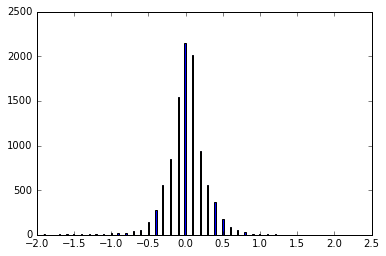

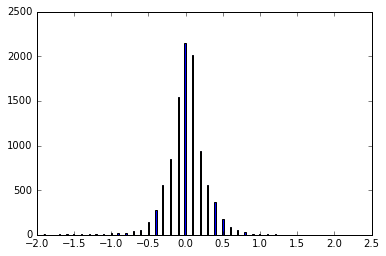

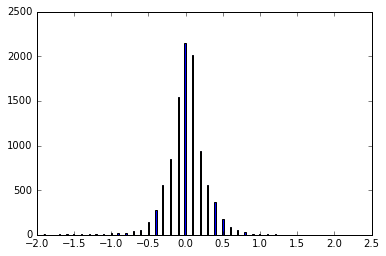

In [7]:
env.reset()
S = []
for i in range(10000):
    s, _, done,_ = env.step(env.action_space.sample())
    S.append(preprocess(s))
    if done:
        env.reset()
    
for i in range(len(s)):
    plt.hist(np.array(S)[:,0],bins=250);
    plt.show()


In [8]:
agent = QLearningAgent(0.125,0.30,0.8,lambda s:range(env.action_space.n))

In [11]:
for i in range(100):
    total_r = 0.

    for _ in range(109):
        s = preprocess(env.reset())
        agent.epsilon -= 0.0001*agent.epsilon
        for _ in range(50):
            a = agent.getAction(s)
            s_next,r,done,_ = env.step(a)
            s_next = preprocess(s_next)
            total_r += r
            agent.update(s,a,s_next,r)
            s=s_next
            env.render()
            if done:break
    print(total_r / 100., agent.epsilon)


38.82 0.27014996596563184
40.72 0.26722117579991655
39.77 0.2643241376716449
42.84 0.26145850734588577
41.16 0.2586239443196784
44.4 0.2558201117815749
42.86 0.2530466765716162
44.61 0.250303309141749
44.02 0.24758968351666305
43.52 0.24490547725506223
43.44 0.2422503714113484
43.07 0.23962405049772392


KeyboardInterrupt: 

In [67]:
agent._qValues.keys()[:10]

[(-0.049264495132504263,
  -1.197639982108303,
  0.10073787603308711,
  1.8440512070472028),
 (0.0026846256999699981,
  -0.99221195763420145,
  0.087873765297374437,
  1.5608722346744246),
 (-0.013468770141749624,
  -0.42193567133117443,
  0.035195219723770869,
  0.59170878022728313),
 (-0.041358117424969185,
  -0.4012270436878087,
  0.036403010350044077,
  0.60420329918256066),
 (-0.037503752075961176,
  -0.78675605219913569,
  0.022368847492591767,
  1.1806256399057686),
 (-0.13297716977208088,
  -1.5639946794033273,
  0.15246606172721933,
  2.3726427206443619),
 (0.031247611489792909,
  0.031816141164606127,
  0.018817785369195372,
  0.035787412363803409),
 (-0.087803589056026171,
  -1.371984238497358,
  0.10130053849986825,
  2.05764138184704),
 (-0.026645097094962399,
  -0.96404577906326183,
  0.063199807343008452,
  1.4489197984069055),
 (-0.1065937439866334,
  -1.194829263092902,
  0.10489835884520694,
  1.7818843897262493)]

SFFF
FHFH
FFFH
HFFG
  (Left)
